In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import h5py
import pandas as pd
import matplotlib
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import seaborn as sns
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec


plt.style.use('science')
matplotlib.rcParams.update({'font.size': 25})

In [2]:
full_catalog_df = pd.read_csv('../Shared_data_files/catalog_full.csv')

In [3]:
full_catalog_df = full_catalog_df.drop([1,2])

In [4]:
full_catalog_df

,Name,EclipticLatitude,EclipticLongitude,Mass1,Mass2,Spin1,Spin2,Inclination,InitialFrequency,InitialPhase,Polarization,Redshift,Distance,ObservationDuration,Cadence
0,Source 1,0.951881,5.683863,35.432815,32.089232,0.763621,0.206713,2.979326,0.005858,3.394436,3.176550,0.034875,159.904954,6.311630e+07,5
3,Source 5,0.078151,3.504416,34.499636,28.802451,-0.681947,-0.385757,0.738223,0.012243,1.996578,1.861111,0.036661,168.310236,6.311630e+07,5
4,Source 6,-0.646900,1.903788,8.571895,7.564647,0.210554,-0.599386,1.052530,0.028024,0.387789,2.301022,0.003862,17.304767,6.311630e+07,5
5,Source 8,0.104561,1.691095,33.712362,19.926473,-0.022495,0.032351,1.526063,0.027654,2.186094,1.624495,0.007569,34.013334,6.311630e+07,5
6,Source 9,-0.654182,0.802623,30.724619,29.227329,0.123650,0.078372,2.075090,0.023768,1.341579,5.384847,0.018876,85.540696,6.311630e+07,5
7,Source 10,-1.235802,3.288491,48.087722,42.093315,-0.110226,0.194370,2.685023,0.011311,3.138914,1.999555,0.036789,168.911407,6.311630e+07,5


In [5]:
# Choose a discrete colormap (here "tab10")
base_cmap = plt.cm.get_cmap("tab10")

# Extract the first 5 colors
colors = base_cmap.colors[:5]

# Create a ListedColormap
cmap = ListedColormap(colors)

/var/folders/8g/7279dvmd20vd_b85_lr8pfh80000gp/T/ipykernel_8634/1291141854.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base_cmap = plt.cm.get_cmap("tab10")


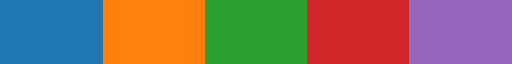

In [6]:
cmap

Source 5
Source 6


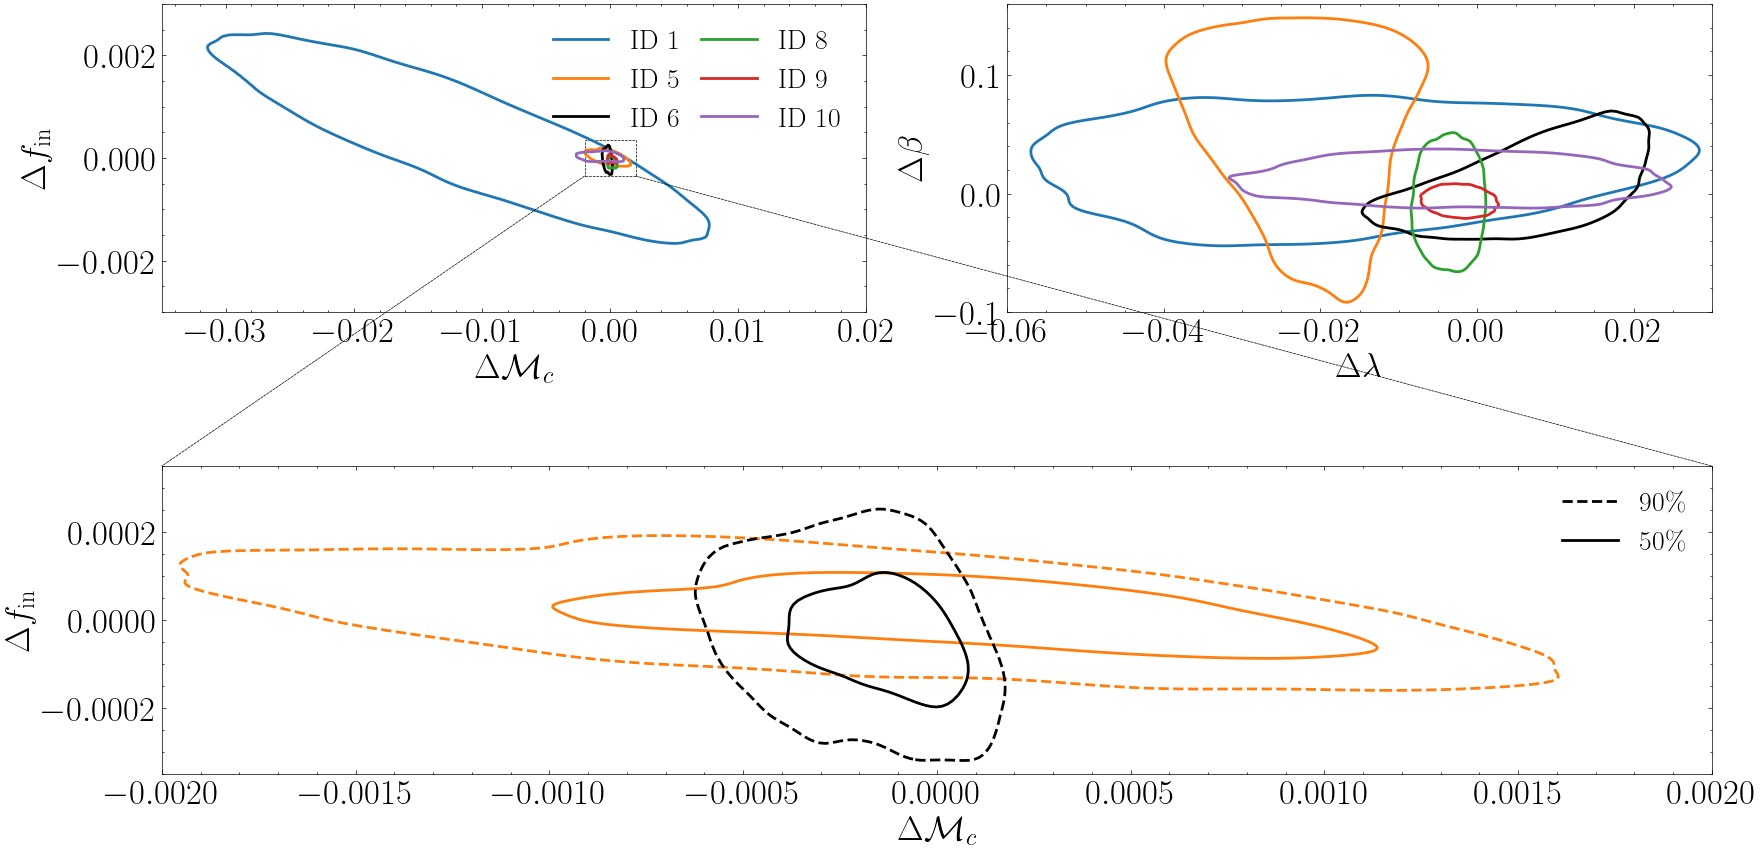

In [7]:
fig,axs = plt.subplots(figsize=(20,10),ncols=2,nrows=2)



for index,(key,row) in enumerate(full_catalog_df.iterrows()):

    if row['Name'] in ['Source 8','Source 9','Source 10']:
        offset = -1 
    else: 
        offset = 0 
    m1 = row['Mass1']
    m2 = row['Mass2']

    mc_inj = (m1*m2)**(3/5) / (m1+m2)**(1/5)

    f0_inj = row['InitialFrequency']
    lambda_inj = row['EclipticLongitude']
    beta_inj = row['EclipticLatitude']

    name = row['Name']

    posterior_array = pd.read_csv('../Shared_data_files/N_50_posteriors/'+row['Name']+'/posterior_samples.csv')


    posterior_array['Mc'] -= mc_inj
    posterior_array['f0'] -= f0_inj
    posterior_array['lam'] -= lambda_inj
    posterior_array['beta'] -= beta_inj

    # Normalisation by prior widths 
    posterior_array['Mc'] *= 1 / 5 
    posterior_array['lam'] *= 1 / (2*np.pi)
    posterior_array['beta'] *= 1 / np.pi

    if f0_inj <1.e-2:
        posterior_array['f0'] *= 1 /(1.e-4)
    else: 
        posterior_array['f0'] *= 1 /(1.e-3)

    df = pd.DataFrame(posterior_array)

    if row['Name'] != 'Source 6':
        sns.kdeplot(data=df,x='Mc',y='f0', levels=[0.1],label=name,ax=axs[0][0],linewidths=2,color=cmap(index+offset))
        sns.kdeplot(data=df,x='lam',y='beta', levels=[0.1],label=name,ax=axs[0][1],linewidths=2,color=cmap(index+offset))
    else: 
        sns.kdeplot(data=df,x='Mc',y='f0', levels=[0.1],label=name,ax=axs[0][0],linewidths=2,color='k')
        sns.kdeplot(data=df,x='lam',y='beta', levels=[0.1],label=name,ax=axs[0][1],linewidths=2,color='k')

# Suppose these are your category colors
labels = ['ID 1', 'ID 5', 'ID 6', 'ID 8','ID 9','ID 10']


legend_elements = [Line2D([0], [0], color=cmap(0), lw=2, label='ID 1'),# Source 1
                    Line2D([0], [0], color=cmap(1), lw=2, label='ID 5'),# Source 5 
                    Line2D([0], [0], color='k', lw=2, label='ID 6'),# Source 6 
                    Line2D([0], [0], color=cmap(2), lw=2, label='ID 8'),# Source 8 
                    Line2D([0], [0], color=cmap(3), lw=2, label='ID 9'),# Source 9 
                    Line2D([0], [0], color=cmap(4), lw=2, label='ID 10')]# Source 10
                    
# # Suppose these are your category colors
# labels = ['Source 1', 'Source 5', 'Source 6', 'Source 8','Source 9','Source 10']

# # Create proxy line artists for legend
# legend_elements = [Line2D([0], [0], color=col, lw=2, label=lab) 
#                    for col, lab in zip(cmap.colors, labels)]


# Add the manual legend

axs[0][0].set_xlabel(r'$\Delta \mathcal{M}_c$')
axs[0][0].set_ylabel(r'$\Delta f_{\mathrm{in}}$')
axs[0][0].set_xlim(-0.035,0.02)
axs[0][0].set_ylim(-0.003,0.003)

axs[0][1].set_xlabel(r'$\Delta \lambda$')
axs[0][1].set_ylabel(r'$\Delta \beta$')


axs[0][1].set_xlim(-0.06,0.03)
axs[0][1].set_ylim(-0.1,0.16)

# Remove the bottom two axes
for ax in axs[1]:
    ax.remove()
gs = axs[0, 0].get_gridspec()
ax_bottom = fig.add_subplot(gs[1, :])

for index,(key,row) in enumerate(full_catalog_df.iterrows()):
    if row['Name'] in ['Source 5','Source 6']:
        print(row['Name'])
        m1 = row['Mass1']
        m2 = row['Mass2']

        mc_inj = (m1*m2)**(3/5) / (m1+m2)**(1/5)

        f0_inj = row['InitialFrequency']
        lambda_inj = row['EclipticLongitude']
        beta_inj = row['EclipticLatitude']

        name = row['Name']

        posterior_array = pd.read_csv('../Shared_data_files/N_50_posteriors/'+row['Name']+'/posterior_samples.csv')

        posterior_array['Mc'] -= mc_inj
        posterior_array['f0'] -= f0_inj
        posterior_array['lam'] -= lambda_inj
        posterior_array['beta'] -= beta_inj


        # Normalisation by prior widths 
        posterior_array['Mc'] *= 1 / 5 
        posterior_array['lam'] *= 1 / (2*np.pi)
        posterior_array['beta'] *= 1 / np.pi

        if f0_inj <1.e-2:
            posterior_array['f0'] *= 1 /(1.e-4)
        else: 
            posterior_array['f0'] *= 1 /(1.e-3)
            
        df = pd.DataFrame(posterior_array)
            

        if row['Name'] != 'Source 6':
            sns.kdeplot(data=df,x='Mc',y='f0', levels=[0.1],label=name,ax=ax_bottom,linewidths=2,color=cmap(index),linestyles='--')
            sns.kdeplot(data=df,x='Mc',y='f0', levels=[0.5],label=name,ax=ax_bottom,linewidths=2,color=cmap(index))
        else:
            sns.kdeplot(data=df,x='Mc',y='f0', levels=[0.1],label=name,ax=ax_bottom,linewidths=2,color='k',linestyles='--')
            sns.kdeplot(data=df,x='Mc',y='f0', levels=[0.5],label=name,ax=ax_bottom,linewidths=2,color='k')

        # sns.kdeplot(data=df,x='lam',y='beta', levels=[0.1,0.5],label=name,ax=axs[1][1],linewidths=2,color=cmap(index))

ax_bottom.set_xlabel(r'$\Delta \mathcal{M}_c$')
ax_bottom.set_ylabel(r'$\Delta f_{\mathrm{in}}$')
ax_bottom.set_xlim(-0.002,0.002)
ax_bottom.set_ylim(-0.00035,0.00035)

conn2 = ConnectionPatch(xyA = (-0.002, -0.00035), coordsA=axs[0][0].transData,
                       xyB=(-0.002,0.00035), coordsB=ax_bottom.transData, color = 'k',linestyle='--',lw=0.5)
fig.add_artist(conn2)
# # RIGHT 
conn4 =ConnectionPatch(xyA = (0.002, -0.00035), coordsA=axs[0][0].transData,
                       xyB=(0.002,0.00035), coordsB=ax_bottom.transData, color = 'k',linestyle='--',lw=0.5)
fig.add_artist(conn4)


axs[0,0].add_patch(matplotlib.patches.Rectangle((-0.002, -0.00035), 0.004, 0.0007, fill=False, edgecolor='k', linestyle='--', lw=0.5))


axs[0][0].legend(handles=legend_elements, loc="upper right", frameon=False,fontsize=20,ncol=2,columnspacing=0.75)


# Suppose these are your category colors
labels = [r'$90\%$', r'$50\%$']

# Create proxy line artists for legend
legend_elements =[Line2D([0], [0], color='k', lw=2, label=r'$90\%$',ls='--'),
                  Line2D([0], [0], color='k', lw=2, label=r'$50\%$',ls='-')]

ax_bottom.legend(handles=legend_elements, loc="upper right", frameon=False,fontsize=20)

plt.subplots_adjust(hspace=0.5)
plt.savefig('Overlay_PE_N_50.pdf')
plt.show()